<a href="https://colab.research.google.com/github/wanlichen2024/gdda612_project1/blob/main/604activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import f_oneway

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Draft Questionnaire form 1 (Responses) - Form Responses 1 (1).csv')

In [ ]:
df.head()

,Timestamp,What is your age group?,2. What’s your gender?,3. What’s your weight in kgs?,4. What's your height in cms?,5. What’s your ethnic group?,"6. How often do you eat meals in a day (including tea, coffee, fruits, salads, snacks)?","7. How often do you drink sweetened beverages like soft drinks, juices, etc. or dessert like Rice pudding, cake etc?","8. How often do you drink liquor or alcoholic beverage like beer, wine, cocktail etc.?","9. How often do you eat fried foods such as fries, fish & chips etc.?","10. How often do you eat high salty snacks such as chips, crackers, ... etc.?",12. How often do you eat fruit and vegetables?,"13. How often do you eat saturated fat like mutton fat, egg yolks, etc.?","14. How often do you eat refined food (carb based) items like burgers, pizza, fried rice, pasta, dumpling, pancake, noodles etc.?","15. How often do you eat fatty food like ghee, butter, cream, mayonnaise, etc.?","16. How often do you eat out of the house (such as wedding, party, family function etc.)?",17. How many days do you exercise in a week?,18. How much time do you exercise for each session?,19. How you rating your health condition? 5 is most health condition.,20. Do you take health supplement?
0,5/14/2024 10:40:24,46 to 55,Male,100,178,Middle Eastern,4 times daily,1 to 2 times a week,Never,1 to 2 times a week,1 to 2 times a week,At least once a day,At least once daily,At least once daily,NaN,1 time in a month,1 to 2 times a week,>40 minutes,4,Yes
1,5/14/2024 10:47:18,26 to 35,Female,58,165,Asian,2 times daily,1 to 2 times a week,Never,Once a month or less.,1 to 2 times a week,At least once a day,Once a month or less,At least once daily,NaN,More than once a week,1 to 2 times a week,>40 minutes,3,Yes
2,5/14/2024 10:52:48,26 to 35,Male,90,190,European,3 times daily,1 to 2 times a week,Once a month or less.,2 to 3 times a month,2 to 3 times a month,3 to 4 times a week,2 to 3 times a month,Once a month or less,NaN,1 time in a month,1 to 2 times a week,30–40 minutes,3,No
3,5/14/2024 10:56:04,36 to 45,Female,60,156,Asian,3 times daily,Once a month or less.,Once a month or less.,2 to 3 times a month,Once a month or less.,Every time in the main diet,At least once daily,1 to 2 times a week,NaN,More than once a week,Never,<10 minutes.,4,Yes
4,5/14/2024 10:56:13,56 to 65,Female,65,165,Asian,3 times daily,2 to 3 times a month,Once a month or less.,Once a month or less.,Once a month or less.,Every time in the main diet,Once a month or less,Once a month or less,NaN,Less than 1 time in a month,Daily,20–30 minutes,4,Yes


In [ ]:
print(df.columns)

Index(['Timestamp', 'What is your age group?', '2. What’s your gender?',
       '3. What’s your weight in kgs?', '4. What's your height in cms?',
       '5. What’s your ethnic group?',
       '6. How often do you eat meals in a day (including tea, coffee, fruits, salads, snacks)?',
       '7. How often do you drink sweetened beverages like soft drinks, juices, etc. or dessert like Rice pudding, cake etc?',
       '8. How often do you drink liquor or alcoholic beverage like beer, wine, cocktail etc.?',
       '9. How often do you eat fried foods such as fries, fish & chips etc.?',
       '10. How often do you eat high salty snacks such as chips, crackers, ... etc.?',
       '12. How often do you eat fruit and vegetables?',
       '13. How often do you eat saturated fat like mutton fat, egg yolks, etc.?',
       '14. How often do you eat refined food (carb based) items like burgers, pizza, fried rice, pasta, dumpling, pancake, noodles etc.?',
       '15. How often do you eat fatty food l

In [ ]:
#rename columns
df1 = df.rename(columns={'What is your age group?':'Age_group',
                        '2. What’s your gender?':'Gender',
                        '3. What’s your weight in kgs?':'Weight_kg',
                        "4. What's your height in cms?":'Height_cm',
                        '5. What’s your ethnic group?':'Ethnic',
                        '6. How often do you eat meals in a day (including tea, coffee, fruits, salads, snacks)?':'Meals per day',
                        '7. How often do you drink sweetened beverages like soft drinks, juices, etc. or dessert like Rice pudding, cake etc?':'Stweeten beverage',
                        '8. How often do you drink liquor or alcoholic beverage like beer, wine, cocktail etc.?':'Alcohol',
                        '9. How often do you eat fried foods such as fries, fish & chips etc.?':'fried food',
                        '10. How often do you eat high salty snacks such as chips, crackers, ... etc.?':'salty snack',
                        '12. How often do you eat fruit and vegetables?':"fruit and vege",
                        "13. How often do you eat saturated fat like mutton fat, egg yolks, etc.?": "Saturated fat",
                        '14. How often do you eat refined food (carb based) items like burgers, pizza, fried rice, pasta, dumpling, pancake, noodles etc.?':'Refined_food',
                        '15. How often do you eat fatty food like ghee, butter, cream, mayonnaise, etc.?':'fatty food',
                        '16. How often do you eat out of the house (such as wedding, party, family function etc.)?':'eating out',
                        '17. How many days do you exercise in a week?':'Excercise per week',
                        '18. How much time do you exercise for each session?':'Exercis duration',
                        '19. How you rating your health condition? 5 is most health condition.':'Health ranking',
                        '20. Do you take health supplement? ':'Eat supplement?'})





In [ ]:
df1.head()

,Timestamp,Age_group,Gender,Weight_kg,Height_cm,Ethnic,Meals per day,Stweeten beverage,Alcohol,fried food,salty snack,fruit and vege,Saturated fat,Refined_food,fatty food,eating out,Excercise per week,Exercis duration,Health ranking,Eat supplement?
0,5/14/2024 10:40:24,46 to 55,Male,100,178,Middle Eastern,4 times daily,1 to 2 times a week,Never,1 to 2 times a week,1 to 2 times a week,At least once a day,At least once daily,At least once daily,NaN,1 time in a month,1 to 2 times a week,>40 minutes,4,Yes
1,5/14/2024 10:47:18,26 to 35,Female,58,165,Asian,2 times daily,1 to 2 times a week,Never,Once a month or less.,1 to 2 times a week,At least once a day,Once a month or less,At least once daily,NaN,More than once a week,1 to 2 times a week,>40 minutes,3,Yes
2,5/14/2024 10:52:48,26 to 35,Male,90,190,European,3 times daily,1 to 2 times a week,Once a month or less.,2 to 3 times a month,2 to 3 times a month,3 to 4 times a week,2 to 3 times a month,Once a month or less,NaN,1 time in a month,1 to 2 times a week,30–40 minutes,3,No
3,5/14/2024 10:56:04,36 to 45,Female,60,156,Asian,3 times daily,Once a month or less.,Once a month or less.,2 to 3 times a month,Once a month or less.,Every time in the main diet,At least once daily,1 to 2 times a week,NaN,More than once a week,Never,<10 minutes.,4,Yes
4,5/14/2024 10:56:13,56 to 65,Female,65,165,Asian,3 times daily,2 to 3 times a month,Once a month or less.,Once a month or less.,Once a month or less.,Every time in the main diet,Once a month or less,Once a month or less,NaN,Less than 1 time in a month,Daily,20–30 minutes,4,Yes


In [ ]:
#check missing value, and drop missing value
df1.isnull().sum()

Timestamp              0
Age_group              0
Gender                 0
Weight_kg              0
Height_cm              0
Ethnic                 0
Meals per day          0
Stweeten beverage      0
Alcohol                0
fried food             0
salty snack            0
fruit and vege         0
Saturated fat          0
Refined_food           0
fatty food            40
eating out             0
Excercise per week     0
Exercis duration       0
Health ranking         0
Eat supplement?        0
dtype: int64

In [ ]:
df1 = df1.drop(columns=['fatty food'])

In [ ]:
# Handle Categorical Data:


#  LabelEncoder
label_encoder = LabelEncoder()

# Label
df1['Age_group'] = label_encoder.fit_transform(df1['Age_group'])
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Ethnic'] = label_encoder.fit_transform(df1['Ethnic'])
df1['Meals per day'] = label_encoder.fit_transform(df1['Meals per day'])
df1['Stweeten beverage'] = label_encoder.fit_transform(df1['Stweeten beverage'])
df1['Alcohol'] = label_encoder.fit_transform(df1['Alcohol'])
df1['fried food'] = label_encoder.fit_transform(df1['fried food'])
df1['salty snack'] = label_encoder.fit_transform(df1['salty snack'])
df1["fruit and vege"] = label_encoder.fit_transform(df1["fruit and vege"])
df1['Saturated fat'] = label_encoder.fit_transform(df1['Saturated fat'])
df1['Refined_food'] = label_encoder.fit_transform(df1['Refined_food'])
df1['eating out'] = label_encoder.fit_transform(df1['eating out'])
df1['Excercise per week'] = label_encoder.fit_transform(df1['Excercise per week'])
df1['Exercis duration'] = label_encoder.fit_transform(df1['Exercis duration'])
df1['Eat supplement?'] = label_encoder.fit_transform(df1['Eat supplement?'])

In [ ]:
#Descriptive Statistics
df1.describe()

,Age_group,Gender,Weight_kg,Height_cm,Ethnic,Meals per day,Stweeten beverage,Alcohol,fried food,salty snack,fruit and vege,Saturated fat,Refined_food,eating out,Excercise per week,Exercis duration,Health ranking,Eat supplement?
count,40.000000,40.00000,40.00000,40.000000,40.000000,40.000000,40.0000,40.000000,40.000000,40.00000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.825000,0.50000,80.40000,165.550000,2.275000,2.100000,1.6000,2.675000,1.575000,1.62500,1.925000,2.65000,1.800000,2.025000,1.350000,2.500000,3.475000,0.475000
std,1.356608,0.50637,27.14047,27.023209,1.568725,1.410583,1.4641,2.067917,1.393897,1.59627,1.268706,1.54505,1.651728,1.440931,1.561557,1.320451,0.986771,0.505736
min,0.000000,0.00000,48.00000,65.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.000000,0.00000,63.25000,165.000000,1.000000,1.000000,0.0000,0.750000,0.000000,0.00000,1.000000,1.00000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000
50%,1.500000,0.50000,75.00000,172.000000,2.000000,2.000000,2.0000,3.000000,1.000000,1.00000,2.000000,3.00000,1.000000,2.000000,1.000000,3.000000,4.000000,0.000000
75%,3.000000,1.00000,86.25000,178.500000,3.250000,3.000000,2.0000,5.000000,2.000000,3.00000,3.000000,4.00000,4.000000,4.000000,2.250000,4.000000,4.000000,1.000000
max,5.000000,1.00000,167.00000,190.000000,6.000000,5.000000,4.0000,5.000000,4.000000,4.00000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,5.000000,1.000000


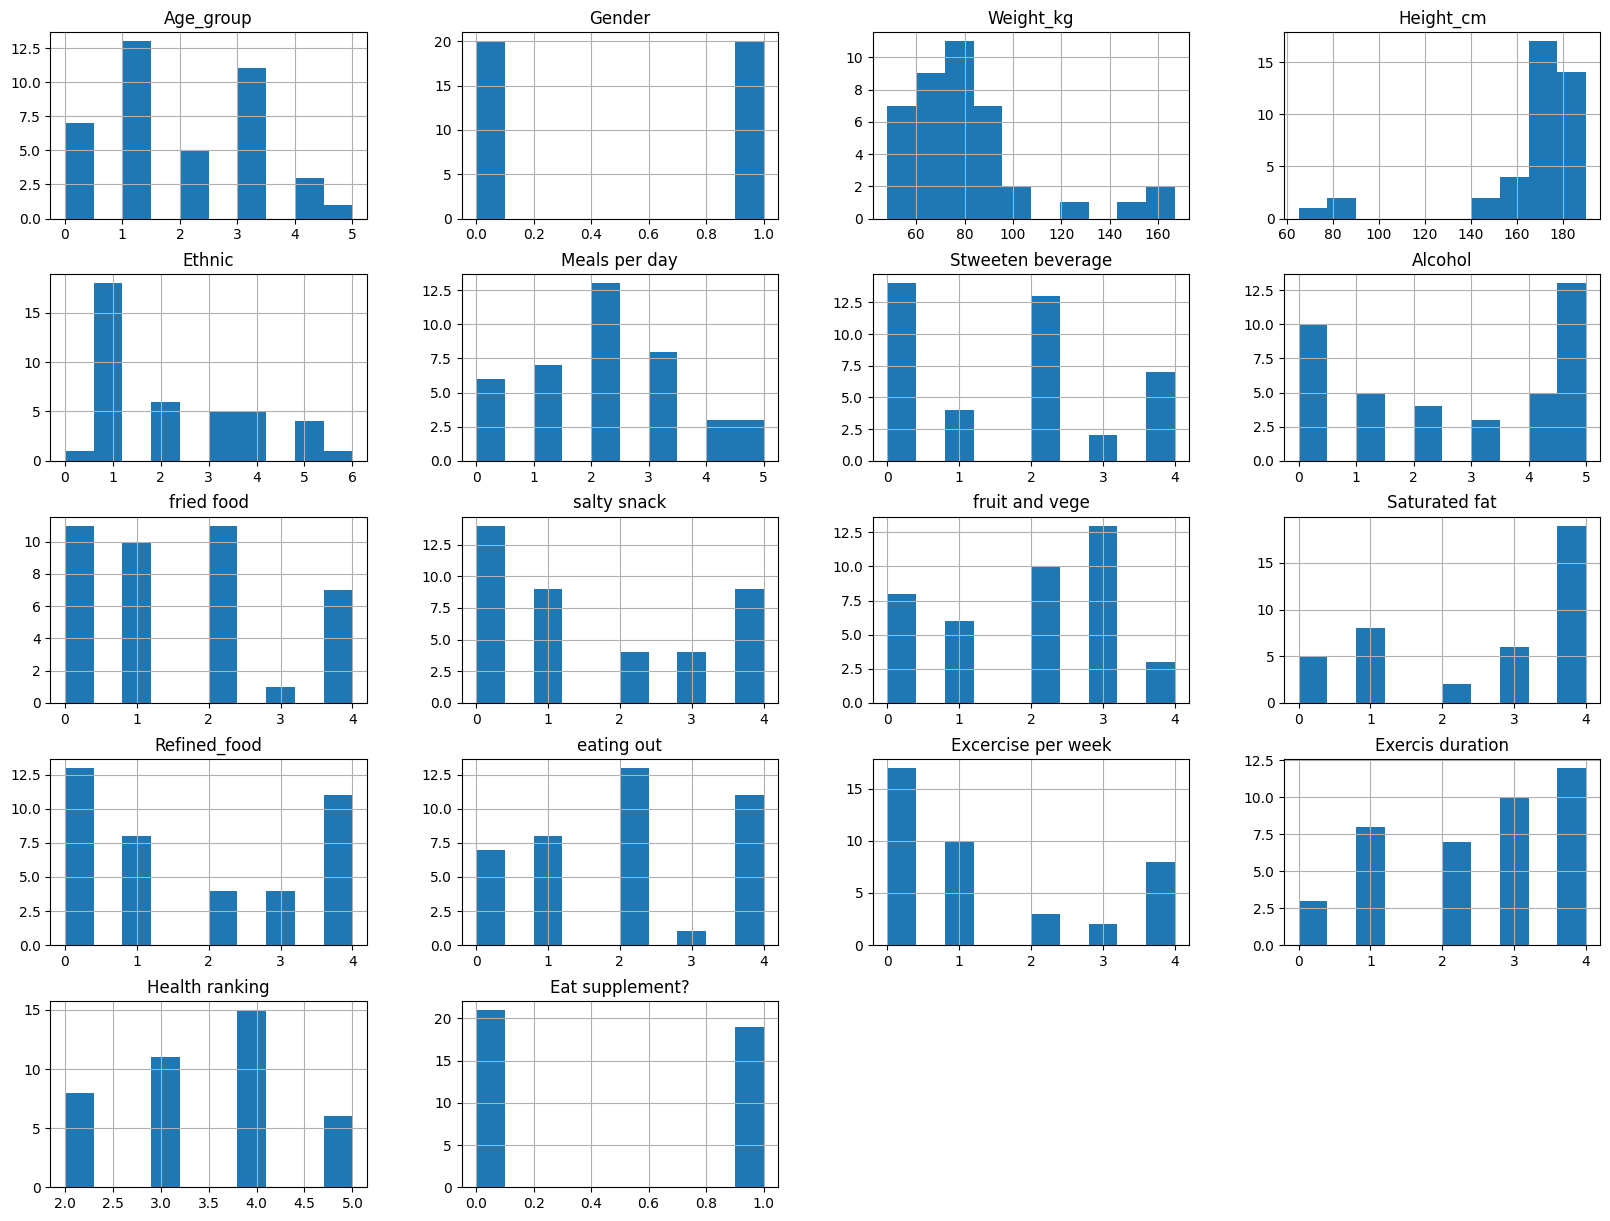

In [ ]:
# visualise columns distribution in histogram

df1.hist(bins=10, figsize=(20,15))
plt.show()

In [ ]:
print(df1.dtypes)

Timestamp             object
Age_group              int64
Gender                 int64
Weight_kg              int64
Height_cm              int64
Ethnic                 int64
Meals per day          int64
Stweeten beverage      int64
Alcohol                int64
fried food             int64
salty snack            int64
fruit and vege         int64
Saturated fat          int64
Refined_food           int64
eating out             int64
Excercise per week     int64
Exercis duration       int64
Health ranking         int64
Eat supplement?        int64
dtype: object


In [ ]:
# excluded the first column (date), change to float type for visualise as boxplot
date_column = df1.iloc[:, 0]
df2 = df1.iloc[:, 1:]
df2 = df2.astype(float)

print(df2)


    Age_group  Gender  Weight_kg  Height_cm  Ethnic  Meals per day  \
0         3.0     1.0      100.0      178.0     4.0            2.0   
1         1.0     0.0       58.0      165.0     1.0            0.0   
2         1.0     1.0       90.0      190.0     2.0            1.0   
3         2.0     0.0       60.0      156.0     1.0            1.0   
4         4.0     0.0       65.0      165.0     1.0            1.0   
5         2.0     0.0       61.0      173.0     1.0            5.0   
6         3.0     1.0       70.0      175.0     5.0            2.0   
7         1.0     1.0       82.0      178.0     3.0            3.0   
8         2.0     0.0       74.0      167.0     2.0            4.0   
9         1.0     0.0       54.0      159.0     1.0            2.0   
10        0.0     1.0       85.0      188.0     5.0            1.0   
11        3.0     0.0       70.0      160.0     1.0            0.0   
12        1.0     1.0       60.0      180.0     1.0            0.0   
13        1.0     0.

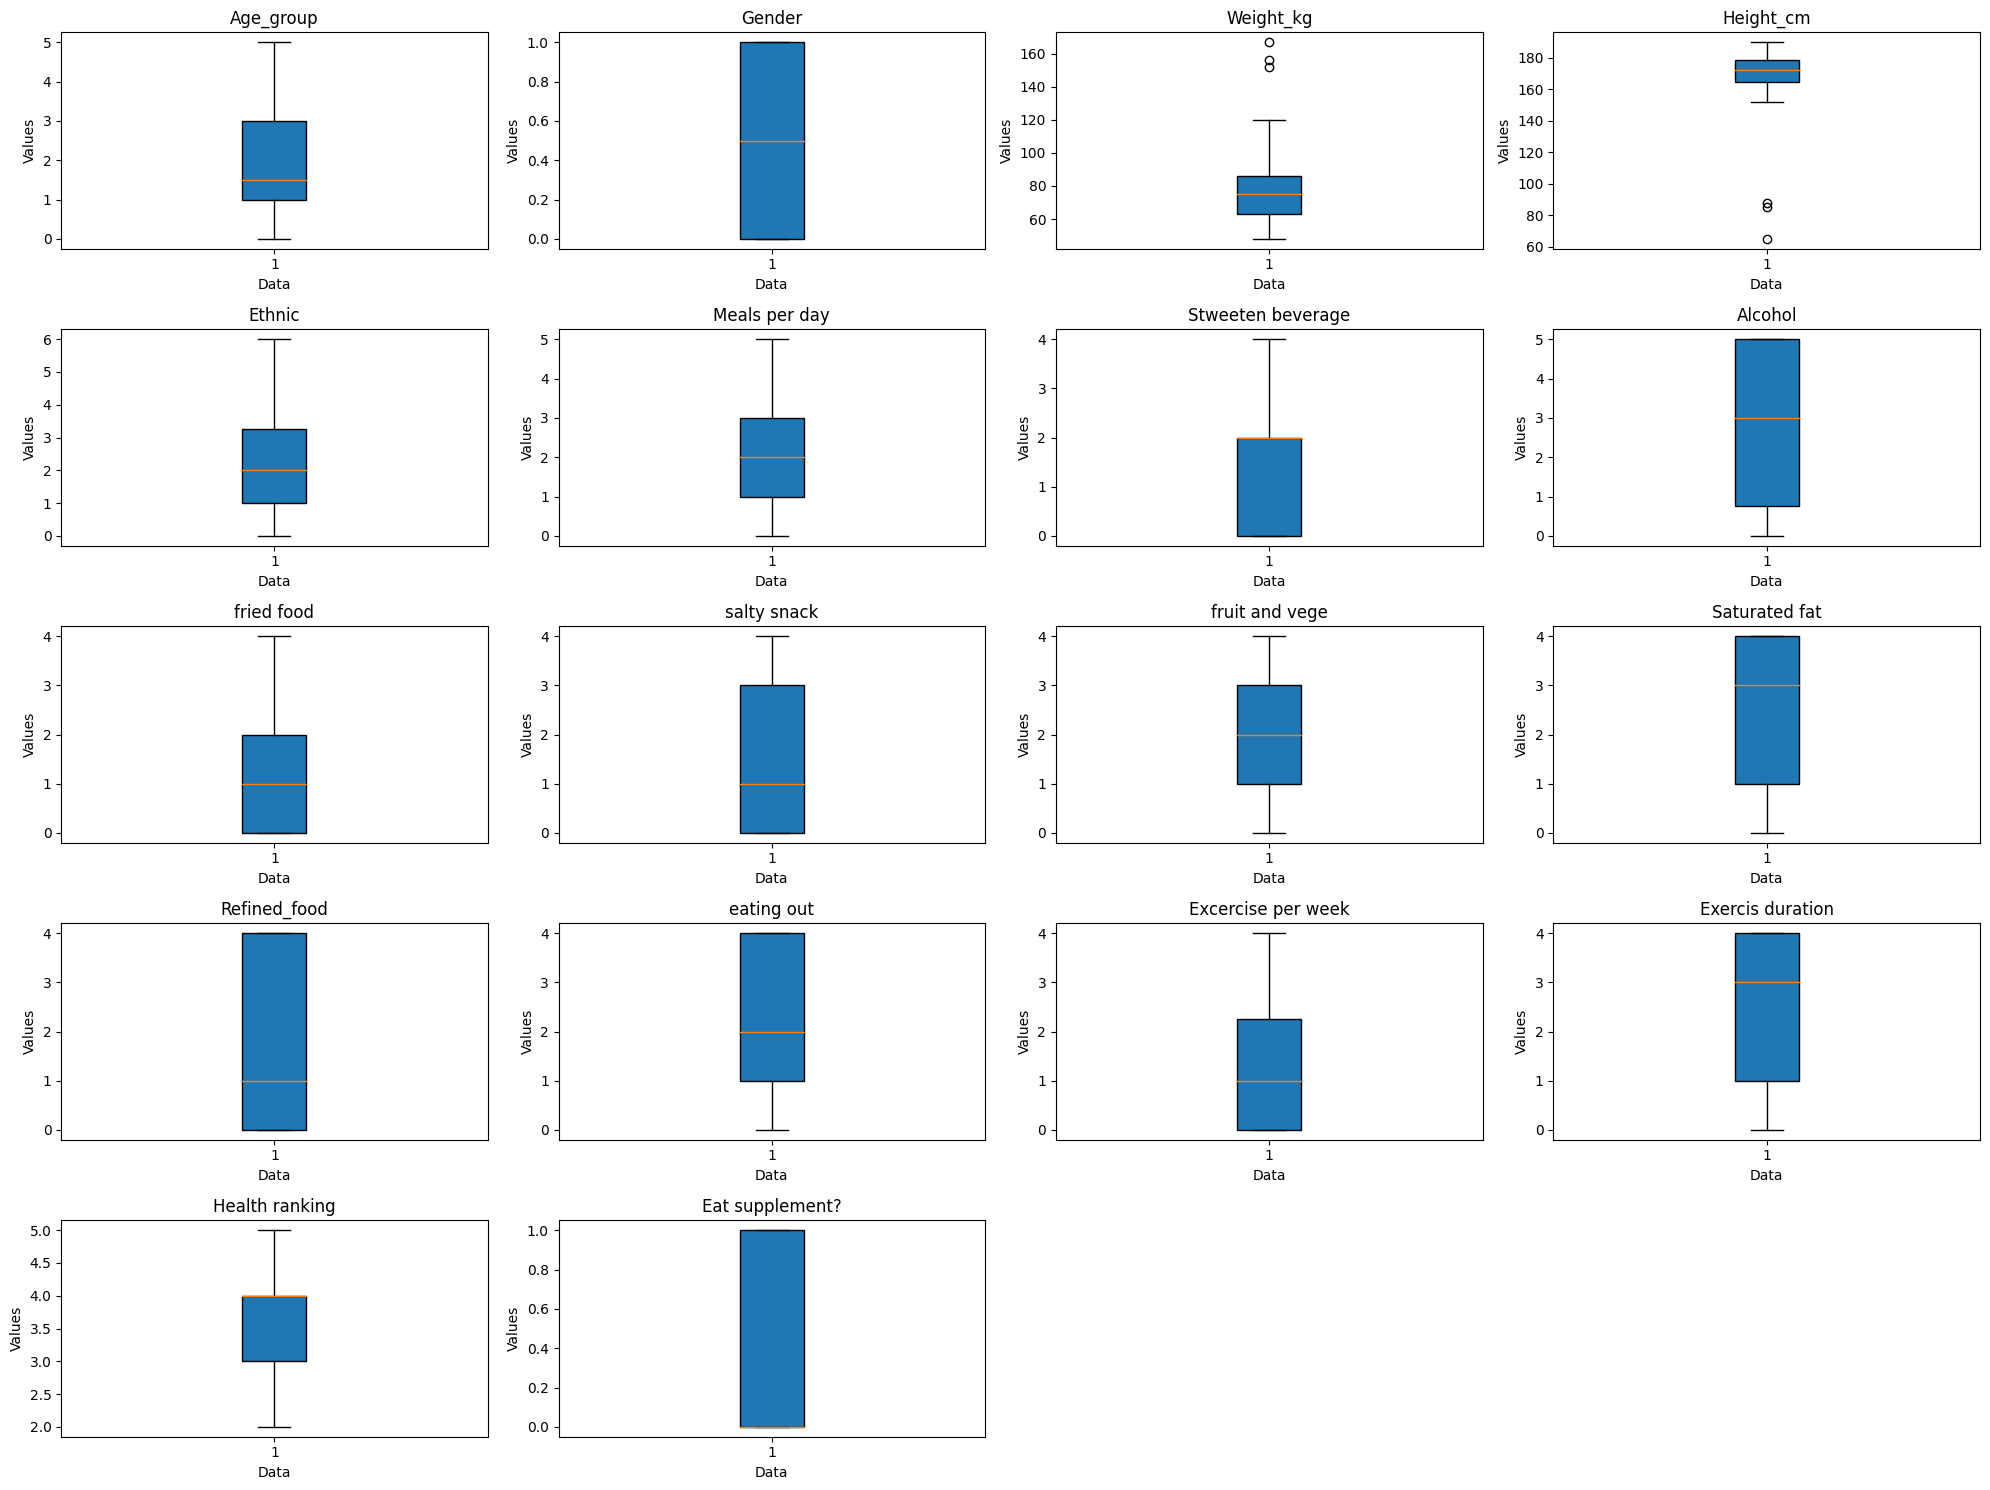

In [ ]:
#visualise in boxplot
# caculate how many columns to be showed
import math  # Add this line to import the math module
num_cols = len(df2.columns)
num_rows = math.ceil(num_cols / 4)  # every line max 4 pic

plt.figure(figsize=(20, 15))


for i, col in enumerate(df2.columns):
    plt.subplot(num_rows, 4, i+1)
    plt.boxplot(df2[col], patch_artist=True)
    plt.title(col)
    plt.xlabel('Data')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()



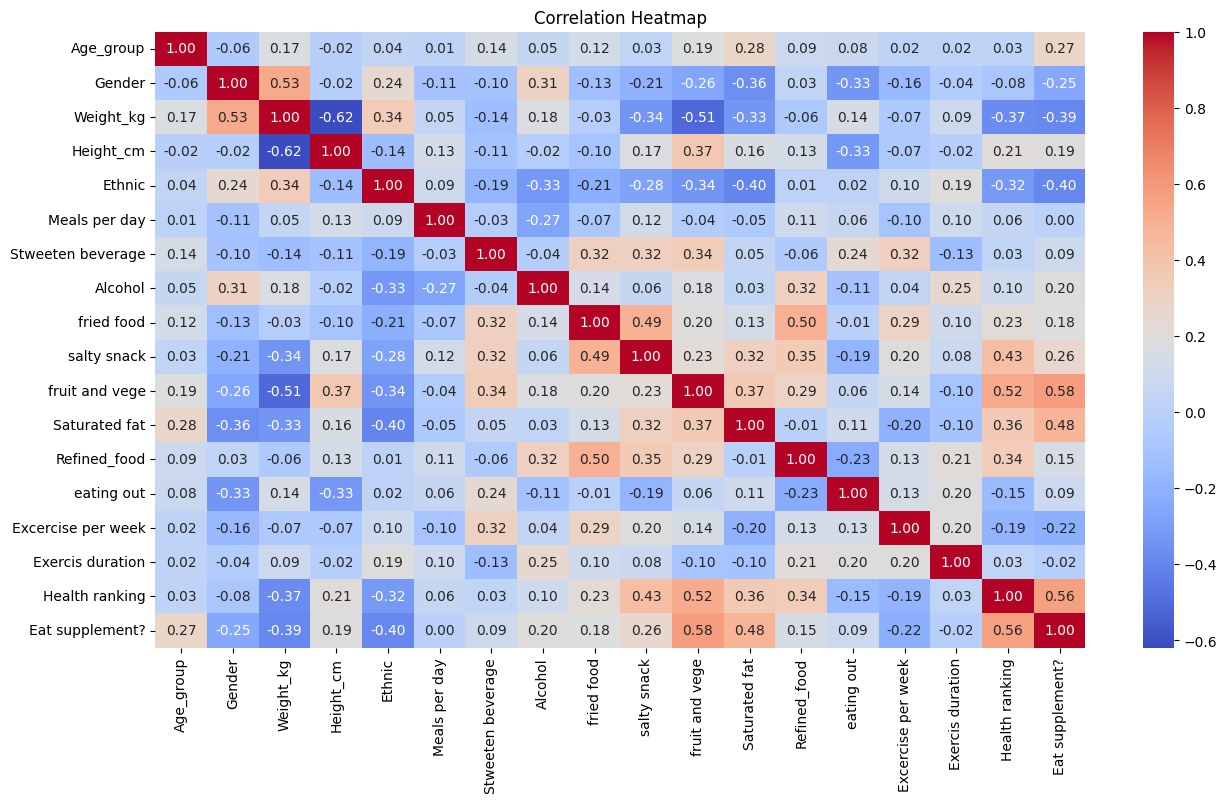

In [ ]:
#Inferential Statistics
# 1. correlation analysis
correlation_matrix = df2.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# 2. T test or ANOVA

# Select dataframe : find out the differences of two genders weight.
data1 = {'Gender': df1['Gender'],
         'Weight_kg': df1['Weight_kg']}
data2 = {'Weight_kg': df1['Weight_kg']}

df5 = pd.DataFrame(data1)
df6 = pd.DataFrame(data2)

# select 2 sample group
group1 = df6[df5['Gender'] == 0]['Weight_kg'].dropna()
group2 = df6[df5['Gender'] == 1]['Weight_kg'].dropna()

# check sample group data
print("Group 1:", group1)
print("Group 2:", group2)

# ensure every group have data
if len(group1) == 0 or len(group2) == 0:
    print("one group missed data")
else:
    # T test proceed
    t_statistic, p_value = stats.ttest_ind(group1, group2)

    # Output
    print("T test :", t_statistic)
    print("P value:", p_value)


Group 1: 1     58
3     60
4     65
5     61
8     74
9     54
11    70
13    48
14    51
17    87
18    71
19    64
24    78
25    77
26    55
30    76
34    55
36    72
37    76
39    74
Name: Weight_kg, dtype: int64
Group 2: 0     100
2      90
6      70
7      82
10     85
12     60
15    120
16     72
20     82
21    152
22    156
23    167
27     95
28     93
29     76
31     57
32     64
33     86
35     85
38     98
Name: Weight_kg, dtype: int64
T test : -3.8138912026618517
P value: 0.0004884795066825837


P value < 0.05, so we reject the null hypothesis. There is a significant difference between the means of the two groups.

In [ ]:
# select 2 sample groups
group1 = df1[df1['Gender'] == 0]['Weight_kg']
group2 = df1[df1['Gender'] == 1]['Weight_kg']

# process ANOVA
anova_result = stats.f_oneway(group1, group2)

# outcome
print("ANOVA result:", anova_result)


ANOVA result: F_onewayResult(statistic=14.545766105741452, pvalue=0.0004884795066825869)


P value < 0.05, reject null hypothesis.
The ANOVA result indicated more than one mean significant difference in the groups.

In [ ]:
!pip install factor_analyzer

In [ ]:
#factor analysis
import math
from factor_analyzer import FactorAnalyzer
# why factor = 5?
fa = FactorAnalyzer(n_factors=5)

fa.fit(df2[2:])


factor_loadings = fa.loadings_


explained_variance = fa.get_factor_variance()


print("factor loadings:")
print(factor_loadings)
print("explained variance:")
print(explained_variance)


factor loadings:
[[ 0.28745235  0.05484726  0.3005436   0.01590083  0.00662505]
 [-0.26959259  0.06190154  0.07956438 -0.24370333  0.55880256]
 [-0.31540888  0.09744268  0.83150823 -0.2790143   0.32681993]
 [ 0.14455282  0.03154963 -0.62194918 -0.04233026 -0.10942567]
 [-0.594689    0.08225221  0.07607863 -0.01640635 -0.23230064]
 [ 0.00387679  0.21438805  0.02659007 -0.27106584 -0.45763006]
 [ 0.17606252  0.04162328  0.12975376  0.48730761  0.07113207]
 [ 0.17976035  0.18995675  0.11953482  0.03109778  0.60746759]
 [ 0.12022632  0.65312067  0.10681156  0.27249964  0.14468707]
 [ 0.3051659   0.53073572 -0.17517315  0.12011995 -0.05718546]
 [ 0.58827274  0.07740171 -0.18247324  0.23465027  0.0488745 ]
 [ 0.70312053 -0.08332335  0.06190526 -0.11295804 -0.11858049]
 [ 0.02261712  0.76519058 -0.12760003 -0.02236178  0.10009281]
 [ 0.11875664 -0.21541807  0.54296438  0.1963912  -0.30911395]
 [-0.43619692  0.27671446 -0.09962891  0.84761322  0.03803851]
 [-0.19690499  0.32188215  0.10034328 

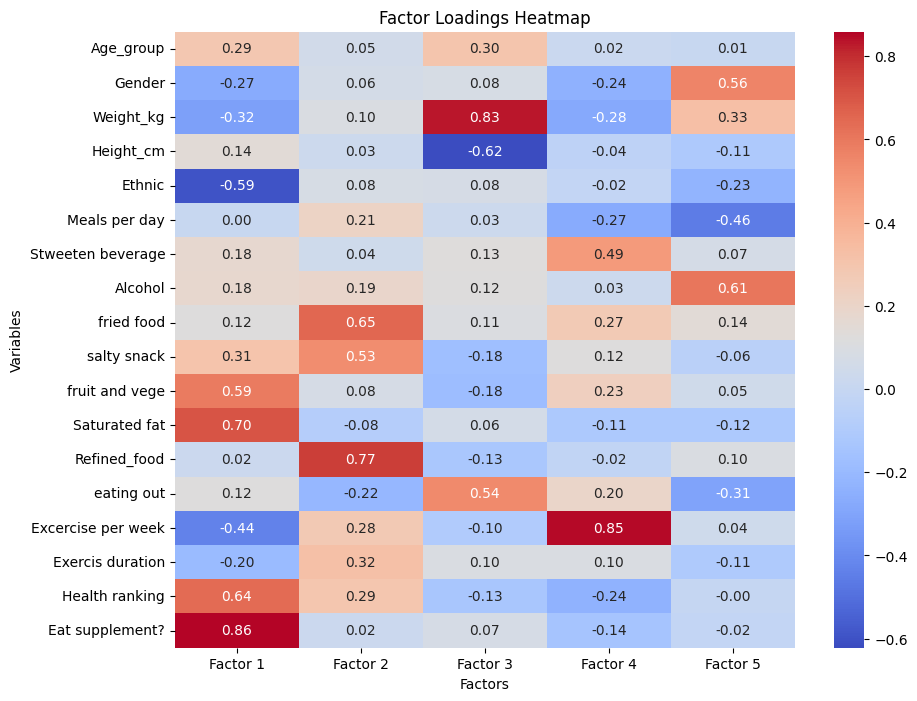

In [ ]:
# conver to dataframe
factor_loadings_df = pd.DataFrame(factor_loadings, index=df2.columns, columns=[f"Factor {i+1}" for i in range(factor_loadings.shape[1])])


# heatmap visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings_df, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()


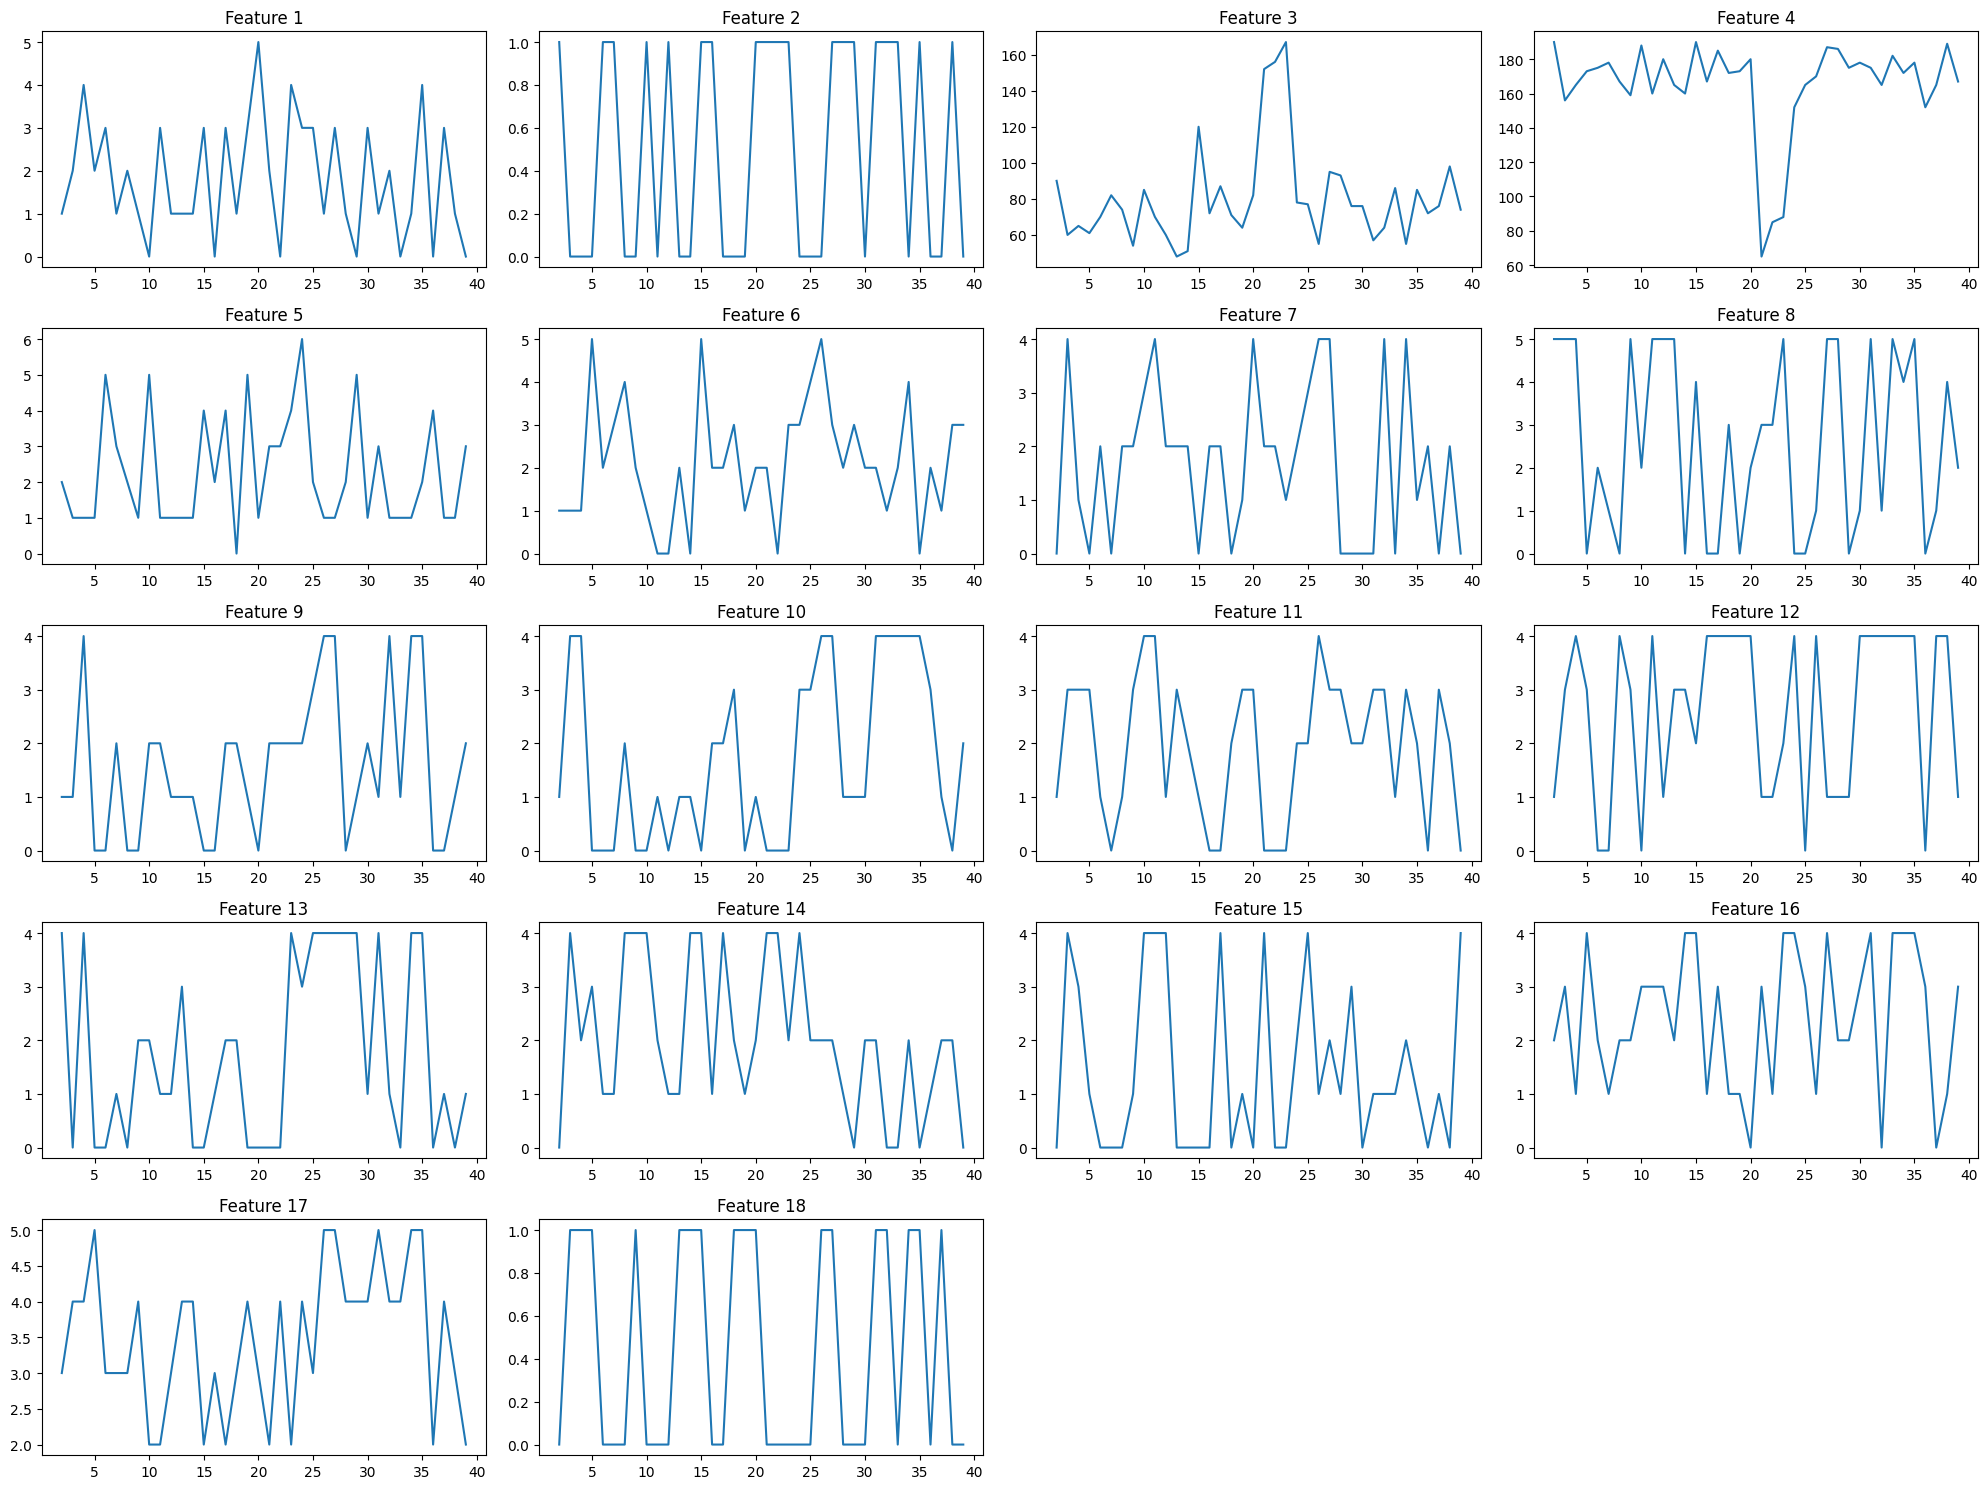

In [ ]:
##try to find out the best number of factors.
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
!pip install factor-analyzer
from factor_analyzer.rotator import Rotator
import pandas as pd

# Sample DataFrame
data = df2[2:]
df3 = pd.DataFrame(data)

# Calculate how many columns to be shown
num_cols = len(df3.columns)
num_rows = math.ceil(num_cols / 4)  # every line max 4 pics

# Initialize the figure
plt.figure(figsize=(20, 15))

# Use FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation=None)
fa.fit(df3)

# Apply varimax rotation
rotator = Rotator(method='varimax')
rotated_factors = rotator.fit_transform(fa.loadings_)

# Create subplots
for i in range(num_cols):
    plt.subplot(num_rows, 4, i + 1)
    plt.plot(df3.iloc[:, i])
    plt.title(f'Feature {i + 1}')

# Show the figure
plt.tight_layout()
plt.show()


